# K-Nearest Neighbors ; KNN
- 구현이 간단한 머신러닝
- 분류, 회귀 모두 사용 가능
## 1. 개념
- 새로운 데이터 포인트를 분류, 예측할 때, 가장 가까운 K개의 이웃 데이터를 기반으로 결정을 내리는 알고림
- 학습과정에서 모델을 구체적으로 훈련하지 않고, 대신 예측 시점에 전체 데이터 셋을 활용하여 결정을 내림
- 매우 직관적이고 구현하기 쉬움
## 2. 단어
### Nieghbor
- 주어진 데이터 포인트와 가장 가까운 K개의 데이터 포인트를 의미
- 데이터 포인트 간 거리를 계산하여 가장 가까운 이웃을 찾음
### K값
- 이웃의 수를 의미 
- K값은 사용자가 설정해야 함
- 성능에 큰 영향을 미침
    - 너무 작은 K값 : 과적합 될 수 있음
    - 너무 큰 K값 : 과소적합될 수 있음
### 거리 측정
1. 유클리디안 거리Euclidean Distance : 가장 일반적인 거리 측정 방법.
    두 점 사이의 직선 거리 계산

    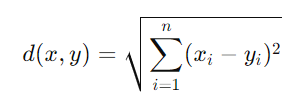

2. 맨해튼 거리 Manhattan Distance : 축에 평행한 경로를 따라 두 점 사이의 거리 계산

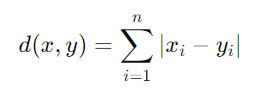

## 3. KNN 알고리즘 과정
### 분류 Classification
1. K 값 선택
2. 새로운 데이터 포인트와 기존 데이터 포인트 간의 거리 계산
3. 가장 가까운 K개 이웃 선택
4. 선택된 K개의 이웃 중 가장 많이 나타나틑 클래스로 새로운 데이터 포인트 분류
### 회귀 Regression
1. K값 선택
2. 새로운 데이터 포인트와 기존 데이터 포인트 간의 거리 계산
3. 가장 가까운 K개 이웃 선택
4. 선택된 K개의 이웃의 평균 값을 사용하여 새로운 데이터 포인트 값 예측
## 장점
- 이해하기 쉽고 구현 간단
- 데이터 분포에 대한 가정이 불필요
- 분류와 회귀 문제 모두 사용 가능
## 단점
- 예측 시점에 모든 데이터 포인트와 거리를 계산해야 하므로 큰 데이터셋에서 느림
- 전체 데이터셋을 저장하고 있어야 하므로 메모리 사용량 큼
- 최적의 K값 선택이 중요하므로, 이를 위해 교차 검증 사용해야 함

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

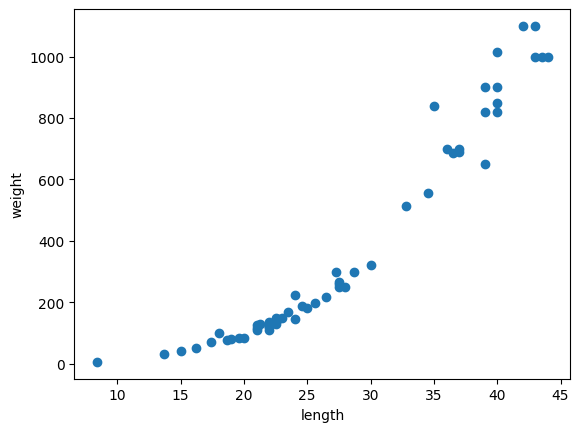

In [2]:
# 데이터 확인하기
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [6]:
# numpy의 배열 크기 자동 지정
# 크기에 -1을 지정하면 나머지 원소 개수로 모두 채움
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


# KNN 회귀

In [7]:
from sklearn.neighbors import KNeighborsRegressor
# KNN 훈련 
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [8]:
print(knr.score(test_input, test_target))

0.992809406101064


### 결정 계수 R-squared ; R^2
- 모델의 예측값이 실제값과 얼마나 일치하는지 나타내는 지표

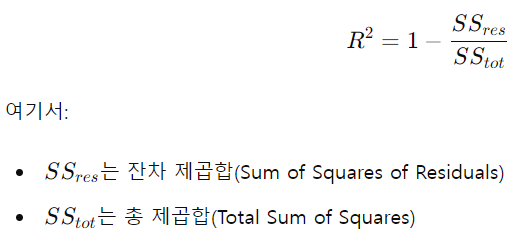

- 잔차 제곱합 : (실제값 - 예측값)^2
- 총 제곱합 : (실제값 - 평균값)^2
- score() 메서드를 이용해 알아볼 수 있음
- 데이터가 평균에 가깝다면 R^2는 0에 가까워 지고, 에측값이 가깝다면 1에 가까워짐

- mean_absolute_error() 메서드
- 실제값과 에측값 사이의 차이를 구해 얼마나 예측에서 벗어났는지 확인
- 실제값과 에측값의 절대값 오차를 평균하여 반환

In [9]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae =  mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

In [10]:
print(knr.score(train_input, train_target))

0.9698823289099254


- 지금 KNN 회귀 모델은 훈련 데이터로 모델을 훈련 시킴
- 훈련된 모델에 테스트 데이터를 넣었을 때 R^2 = 0.99
- 훈련된 모델에 훈련 데이터를 넣었을 때 R^2 = 0.96
- 같은 모델에 테스트 데이터의 R^2가 더 높으므로 과소적합됨
    - 모델이 너무 단순해서 훈련 데이터에서 제대로 훈련되지 않은 경우임
- 훈련 데이터는 전체 데이터를 대표하므로 훈련 데이터를 잘 학습해야 되는 데 문제!


- 추가로 과대적합
    - 같은 모델에 훈련 데이터에서 R^2가 더 좋은 경우
    - 훈련 데이터에만 잘 맞는 모델을 만들어 낸 경우라 실전에서 잘 작동 못함

### 과소적합을 해결하기 위해 모델을 복잡하게 만들 필요가 있음
- KNN에서 모델을 복잡하게 만드는 방법은 이웃의 개수 K값을 낮추는 것!
- K값이 낮아지면, 훈련 데이터에 있는 국지적인 패턴에 민감해짐
- 반대로 K값 높이면, 데이터 전반에 있는 일반 데이터를 따를 것
- KNN의 K값은 기본적으로 5

In [11]:
knr.n_neighbors = 3

# 모델 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [12]:
print(knr.score(test_input, test_target))

0.9746459963987609


- 새로운 같은 모델 기준,
- 훈련 데이터의 R^2 = 0.98
- 테스트 데이터의 R^2 = 0.97
### 결론
- 테스트 데이터의 R^2 값이 훈련 데이터 R^2 보다 낮아져서 과소적합 해결됨
- 두 데이터의 R^2 값이 비슷해서 과대적합 의심 없음

### 만약 과대적합인 경우,
- K값을 늘려 모델을 덜 복잡하게 만들어야 함